In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score,GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Import the necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Malignant Comments Classifier Project\train.csv")
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Import and Visualise the data

In [3]:
data.nunique().sort_values()

malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
id                  159571
comment_text        159571
dtype: int64

In [4]:
data = data.drop('id', axis =1)

Dropped id since it is not useful

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


- All the data are in object or integer type.
- There is no null values. Recheck using .isnull

In [6]:
data.shape

(159571, 7)

159571 rows and 8 columns are present

## EDA and Preprocessing

In [7]:
data.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null values present as said

In [8]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.columns

Index(['comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [10]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')


 The dataset doesn't have any duplicates


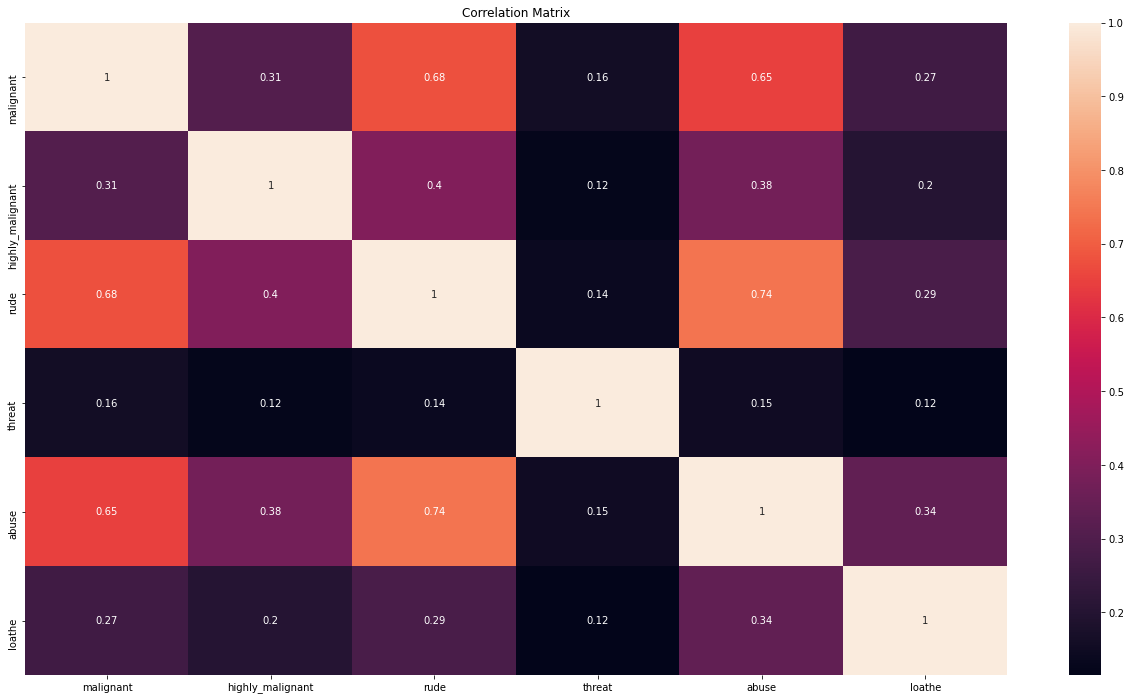

In [11]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

No correlation found

In [12]:
data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


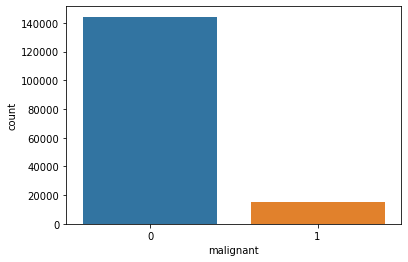

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


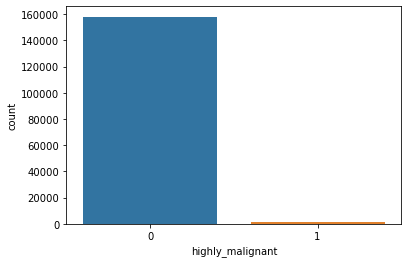

loathe


0    158166
1      1405
Name: loathe, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


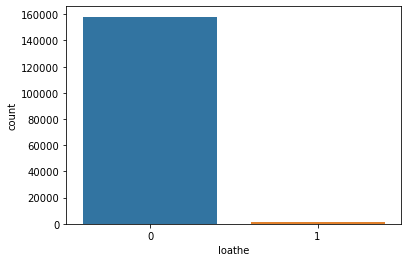

rude


0    151122
1      8449
Name: rude, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


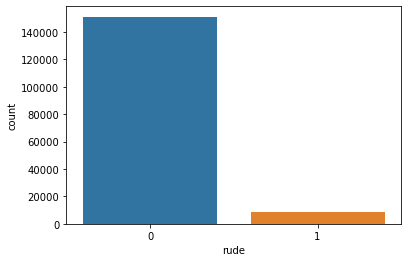

abuse


0    151694
1      7877
Name: abuse, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


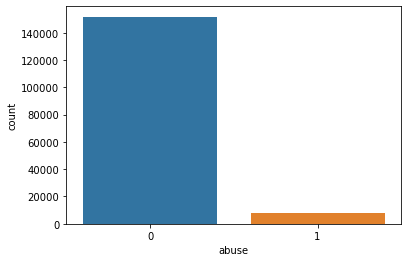

threat


0    159093
1       478
Name: threat, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


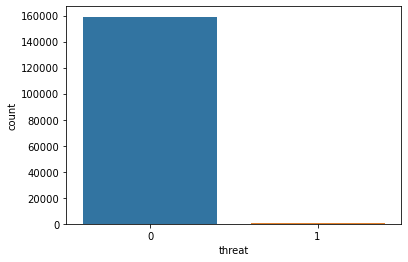

In [13]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(data[i].value_counts())
    sns.countplot(data[i])
    plt.show()

Data is imbalanced

In [14]:
data['length'] = data['comment_text'].str.len()
data.head(2)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [15]:
data['comment_text'] = data['comment_text'].str.lower()

data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
    
data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

data['comment_text'] = data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

<ipython-input-15-456c17bf1223>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
<ipython-input-15-456c17bf1223>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
<ipython-input-15-456c17bf1223>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
<ipython-input-15-456c17bf1223>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
<ipython-input-15-456c17bf1223>:14: FutureWarning: The default value of regex will change from True to F

- Convert all messages to lower case
- Replace email addresses with 'email'
- Replace URLs with 'webaddress'
- Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
- Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
- Replace numbers with 'numbr'

In [16]:
data['clean_length'] = data.comment_text.str.len()
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [17]:
data.length.sum()
data.clean_length.sum()

43575187

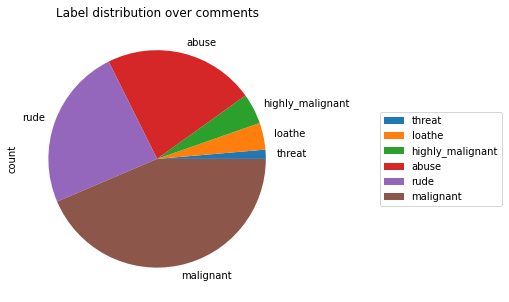

In [18]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
distribution = data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [19]:
target_data = data[cols_target]

data['bad'] = data[cols_target].sum(axis =1)
print(data['bad'].value_counts())

data['bad'] = data['bad'] > 0 
data['bad'] = data['bad'].astype(int)
print(data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


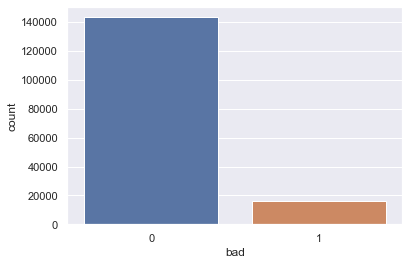

In [20]:
sns.set()
sns.countplot(x="bad" , data = data)
plt.show()

Data is imbalanced

In [21]:
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data['comment_text'])
x = features
y = data['bad']

Convert text into vectors using TF-IDF

## Model building

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56,test_size=.30)

In [23]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({0: 100396, 1: 11303})


C:\Users\Lenovo\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


After fit Counter({0: 100396, 1: 75297})


## Logistic regression

In [24]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 92.25434491978609
[[40121  2829]
 [  879  4043]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     42950
           1       0.59      0.82      0.69      4922

    accuracy                           0.92     47872
   macro avg       0.78      0.88      0.82     47872
weighted avg       0.94      0.92      0.93     47872



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 91.89505347593582
[[40514  2436]
 [ 1444  3478]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     42950
           1       0.59      0.71      0.64      4922

    accuracy                           0.92     47872
   macro avg       0.78      0.82      0.80     47872
weighted avg       0.93      0.92      0.92     47872



## Random Forest Classifier

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 94.4894719251337
[[41922  1028]
 [ 1610  3312]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     42950
           1       0.76      0.67      0.72      4922

    accuracy                           0.94     47872
   macro avg       0.86      0.82      0.84     47872
weighted avg       0.94      0.94      0.94     47872



## SVC

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

## KNeighbors Classifier

In [36]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('Accuracy', accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy 26.35360962566845
[[ 7883 35067]
 [  189  4733]]
              precision    recall  f1-score   support

           0       0.98      0.18      0.31     42950
           1       0.12      0.96      0.21      4922

    accuracy                           0.26     47872
   macro avg       0.55      0.57      0.26     47872
weighted avg       0.89      0.26      0.30     47872



Accuracy score
- Logistic Regression      - 0.92
- Decision tree            - 0.91
- Random Forest Classifier - 0.94
- SVC                      - 0.90
- KNeighbors Classifier    - 0.26

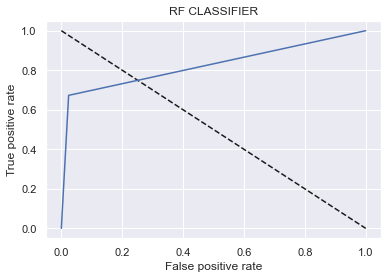

In [28]:
fpr,tpr,thresholds=roc_curve(y_test,predrf)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

## Test data

In [29]:
test=pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Malignant Comments Classifier Project\test.csv")
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [30]:
test.shape

(153164, 2)

In [31]:
test.info

<bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [32]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,ede68d5741920439,""" \n PS I think the list of people the author..."
freq,1,1


In [33]:
test_data = tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [35]:
prediction = rf.predict(test_data)
pd.set_option('display.max_rows', None)
print(prediction)

[1 0 0 ... 1 1 0]
